<a href="https://colab.research.google.com/github/nipetrov/Homework-ML/blob/master/MLatFIAN2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [ ]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

--2020-09-28 20:32:23--  https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv [following]
--2020-09-28 20:32:23--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.4’

train.csv.4         100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-09-28 20:32:24 (2.21 MB/s) - ‘train.csv.4’ saved [60302/60302]



In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [ ]:
for i in range(1,4,1) :
   print(f"Survival rate for {i} class is",np.mean(data.Survived[(data["Pclass"] == i)]))
# <YOUR CODE>
data.groupby(['Pclass']).mean()

Survival rate for 1 class is 0.6296296296296297
Survival rate for 2 class is 0.47282608695652173
Survival rate for 3 class is 0.24236252545824846


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


## Task 2

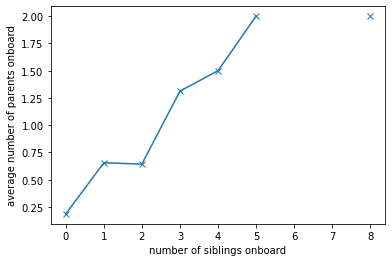

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)
import matplotlib.pyplot as plt
%matplotlib inline  
a = []
for i in np.arange(np.min(data.SibSp), np.max(data.SibSp) + 1, 1):
  a.append(np.mean(data.Parch[data["SibSp"] == i]))
plt.plot(np.arange(np.min(data.SibSp), np.max(data.SibSp) + 1, 1), a, marker="x")
plt.xlabel("number of siblings onboard")
plt.ylabel("average number of parents onboard");

## Task 3

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE
  # E.g.:
  features = dataset[["Fare", "SibSp"]].copy()
#  features["Fare"] /= features["Fare"].mean()
#  features['Fare'] *= 1
#  features['Parch'] /= features['Parch'].std() 
  return features

#model = KNeighborsClassifier(
#    n_neighbors=10
#)
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.79


## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

100%|██████████| 10000/10000 [01:45<00:00, 94.62it/s]


<function matplotlib.pyplot.show>

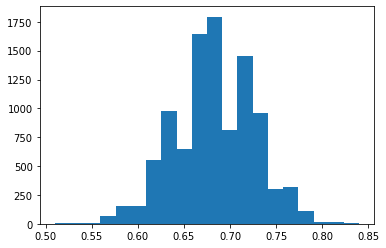

In [ ]:
from sklearn.model_selection import train_test_split
accuracy = []
from tqdm import trange
for i in trange(10000) : 
  X_train, X_test, y_train, y_test = train_test_split(feature_selection_and_preprocessing(data.drop('Survived', axis=1)), 
                                                      data['Survived'], test_size=100, random_state=i)  
  model.fit(
    X_train, y_train
  )
  test_predictions = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, test_predictions))
#  print(accuracy[i])

import matplotlib.pyplot as plt
%matplotlib inline  
plt.hist(accuracy, bins=20);
plt.show